# Sensor Data Fusion
Lecturer: Prof. Baum \
Tutor: Kolja Thormann \
Semester: Winter 21/22
## Homework 6

Assume a robot in 2D-space. Its position is modeled as a Gaussian random variable. The prior has $\hat{\textbf{x}}_0=\begin{bmatrix}0 & 0\end{bmatrix}^\text{T}$ and
$$
\textbf{C}_0=\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}\enspace
$$

---
The following tasks will have missing sections marked that you should fill out. 

Missing code parts are marked by
```
# ... code code code
=== YOUR CODE HERE ===

=== END OF YOUR CODE ===
# ... code code code
```
If you are asked to implement a function, make sure to check what variable will be returned by the function and to fill it accordingly. Do not change code outside of the indicated sections.

Furthermore, some questions require theoretical answers instead of python code.

Such questions will have a field marked like this: 

=== YOUR ANSWER HERE === 

In [128]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import inv

---
### a)
A sensor measures the robot's true position. Formulate and implement a measurement equation assuming independent zero-mean Gaussian noise with
$$
\textbf{R}=\begin{bmatrix}0.2 & 0\\0 & 0.2\end{bmatrix}\enspace.
$$

In [129]:
# def. of variables
t = 1
num_m = 5

x_hat_prior = np.array([0, 0])
x_cov_prior = np.array([[1, 0], [0, 1]])

R = np.array([[0.2, 0], [0, 0.2]])

In [130]:
def measurement_model(x, R):
    """
    Function that takes a measurement of x based on zero-mean Guassian noise with R according to parameters.
    :param x: true location
    :param R: noise
    :return: y, the resulting measurement
    """
    
    # === YOUR CODE HERE ===

    e = np.random.multivariate_normal([0, 0], R)
    y = x + e
    
    # === END OF YOUR CODE ===
    
    return y

---
### b) 
Implement a function which samples a true position of $\textbf{x}$ from the prior and then generates a measurement from the true position using the function from a).

In [131]:
def draw_sample(x_hat, x_cov, R):
    """
    Samples a true position of x from the prior and generates a measurement from the true position
    :param x_hat: x_hat of prior
    :param x_cov: cov of prior
    :param R: measurement noise parameter
    :return: (x,y) the tuple containing the sample and the measurement
    """
    
    # === YOUR CODE HERE ===
    
    x = np.random.multivariate_normal(x_hat, x_cov)
    y = measurement_model(x, R)
    
    # === END OF YOUR CODE ===
    
    return x, y 

---
### c)
Implement the Kalman update formula to calculate the posterior distribution.

In [132]:
def update(x, x_cov, y, R):
    """
    Function that implements the Kalman update formula.
    :param x: current x position
    :param x_cov: current cov. of x
    :param y: measurement
    :param R: measurement noise
    :return: (x_new, x_cov_new) the new values for the position and its covariance
    """
    
    # === YOUR CODE HERE ===
    
    K = x_cov @ inv(x_cov + R)
    x_new = x + K @ (y - x)
    x_cov_new = x_cov - K @ x_cov
    
    # === END OF YOUR CODE ===
    
    return x_new, x_cov_new

---
### d) 
Now, assume the sensor will provide 5 measurements in a row. Use the Kalman filter update formulas to update the robot's state recursively.

Please implement a simple simulation that will draw `num_m` measurements $y$ in a row and apply the update function to each $y$.

Visualize the measurements and the current `x_hat` after each step.

distance to real x:  0.8957037844773786
distance to real x:  0.8712592555432747
distance to real x:  0.8629170700175713
distance to real x:  0.8587343572127663
distance to real x:  0.8562253933169712


/tmp/ipykernel_17089/2754365853.py:22: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)


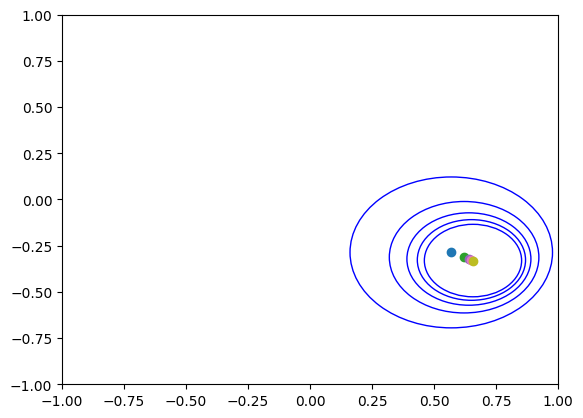

In [133]:
# set x_hat and x_cov to the prior values
x_hat = x_hat_prior
x_cov = x_cov_prior

# === YOUR CODE HERE ===

from matplotlib.patches import Ellipse
def draw_covariance(mean, cov, ax, color):
    """
    Function that draws a covariance matrix as an ellipse.
    
    :param mean:  Center of the ellipse
    :param cov:   Covariance matrix
    :param ax:    Axis on which to plot
    :param color: Color in which to plot the ellipse
    """
    
    # === YOUR CODE HERE ===

    eig_vals, eig_vecs = np.linalg.eig(cov)
    psi = np.arctan2(eig_vecs[1, 0], eig_vecs[0, 0])
    ell = Ellipse(mean, 2.0*np.sqrt(eig_vals[0]), 2.0*np.sqrt(eig_vals[1]), np.rad2deg(psi), fill=False, color=color)
    ax.add_artist(ell)

x, y = draw_sample(x_hat, x_cov, R)
# plt.xlim(-10, 10)
# plt.ylim(-10, 10)

fig, ax = plt.subplots()
b = 1
ax.set_xlim(-b, b)
ax.set_ylim(-b, b)

for i in range(num_m):
    x_hat, x_cov = update(x_hat, x_cov, y, R)
    print('distance to real x: ', np.linalg.norm(x - x_hat))
    draw_covariance(x_hat, x_cov, ax, 'blue')
    ax.scatter(x_hat[0], x_hat[1])
    ax.scatter(x[0], x[1])
    # plt.show()


# === END OF YOUR CODE ===

---
### e)
Visualize the robot's covariance matrix as an ellipse and observe how it changes with each update.

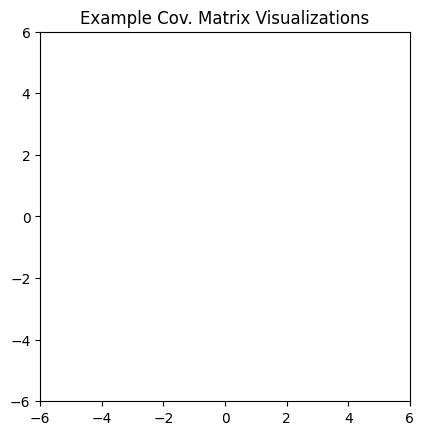

In [134]:
def visualize_covariance(C, m, **kwargs):
    """
    Adds a visualization of a covariance matrix as an ellipse to the current matplotlib plot.
    :param C: Covariance matrix
    :param m: Mean
    :param color: color to draw in (for matplotlib)
    """
    # ensure everything is numpy
    C = np.array(C)
    m = np.array(m)
    
    # === YOUR CODE HERE ===
    
    
    # === END OF YOUR CODE ===
    
    return  # no return value

# test the above function with a very simple example
fig, ax = plt.subplots()

visualize_covariance([[1, 0],[0, 1]], [0, 0], color='b')
visualize_covariance([[2, 0],[0, 0.5]], [3, 0], color='g')
visualize_covariance([[0.5, 0],[0, 2]], [3, 0], color='r')

plt.title("Example Cov. Matrix Visualizations")
plt.axis((-6, 6, -6, 6))

ax.set_aspect('equal')  # ensure the resulting window is square

plt.show()

Now, combine this function with your code from above to re-create the plots, but this time with the covariance matrix visualized as an ellipse too.

In [135]:
# set x_hat and x_cov to the prior values
x_hat = x_hat_prior
x_cov = x_cov_prior

# === YOUR CODE HERE ===


# === END OF YOUR CODE ===